In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df_experiment_clients = pd.read_csv('df_final_experiment_clients.txt')
df_demo = pd.read_csv('df_final_demo.txt')

In [3]:
df_experiment_clients.shape

(70609, 2)

In [4]:
df_demo.shape

(70609, 9)

In [5]:
df_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [6]:
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [7]:
# lowercase the variance column title

df_experiment_clients.columns = df_experiment_clients.columns.str.lower()

In [8]:
df_experiment_clients.head()

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [9]:
df_experiment_clients.variation.isnull().value_counts()

variation
False    50500
True     20109
Name: count, dtype: int64

In [10]:
# Replace the NA values of Variance by "Unknown" values
df_experiment_clients = df_experiment_clients.fillna("Unknown")

In [11]:
# rework demo df columns 

df_demo = df_demo.rename(columns={"clnt_tenure_yr": "tenure_year", "clnt_tenure_mnth": "tenure_month", "clnt_age": "age", "gendr" : "gender", "num_accts":"accounts", "bal": "balance", "calls_6_mnth":"calls_semester", "logons_6_mnth":"logons_semester"})


In [ ]:
df_demo

,client_id,tenure_year,tenure_month,age,gender,accounts,balance,calls_semester,logons_semester
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [ ]:
# Merge the DataFrames on the 'client_id' column
df_experiment_merged = df_experiment_clients.merge(df_demo, on='client_id')
df_experiment_merged

,client_id,variation,tenure_year,tenure_month,age,gender,accounts,balance,calls_semester,logons_semester
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
70604,2443347,Unknown,17.0,204.0,52.5,M,3.0,164693.48,7.0,7.0
70605,8788427,Unknown,10.0,121.0,59.5,M,2.0,203149.13,3.0,3.0
70606,266828,Unknown,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0
70607,1266421,Unknown,13.0,164.0,33.0,M,3.0,27701.79,2.0,3.0


In [14]:
df_experiment_merged.dtypes

client_id            int64
variation           object
tenure_year        float64
tenure_month       float64
age                float64
gender              object
accounts           float64
balance            float64
calls_semester     float64
logons_semester    float64
dtype: object

In [15]:
df_experiment_merged.gender.unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [16]:
#Re mapping incorrect gender values to "U" for unknown
df_experiment_merged.gender = df_experiment_merged.gender.map(lambda x : x == "U" if pd.isna(x) or x == "X" or x == False else x)

In [17]:
df_experiment_merged = df_experiment_merged[df_experiment_merged['gender'] != False]

In [18]:
df_experiment_merged.gender.unique()

array(['U', 'M', 'F'], dtype=object)

In [19]:
df_experiment_merged.tenure_year.isna().sum()

0

In [20]:
# Dropping na values for tenure_year
df_experiment_merged = df_experiment_merged.dropna(subset=['tenure_year'])

In [21]:
df_experiment_merged.tenure_year.isna().sum()

0

In [22]:
df_experiment_merged.tenure_month.isna().sum()

0

In [23]:
# Drop rows where the 'age' column has NaN values
df_experiment_merged = df_experiment_merged.dropna(subset=['age'])

In [24]:
df_experiment_merged.age.isna().sum()

0

In [25]:
# Round values for balance column

df_experiment_merged.balance = df_experiment_merged.balance.round(2)

In [26]:
df_experiment_merged.to_csv('df_experiment_merged.csv', index=False)

In [27]:
# Statistical analysis

df_experiment_merged.describe()

,client_id,tenure_year,tenure_month,age,accounts,balance,calls_semester,logons_semester
count,7.059100e+04,70591.000000,70591.000000,70591.000000,70591.000000,7.059100e+04,70591.000000,70591.000000
mean,5.005066e+06,12.053109,150.661317,46.442542,2.255528,1.474518e+05,3.382457,5.566701
std,2.877324e+06,6.871976,82.091724,15.591381,0.535002,3.015160e+05,2.236601,2.353302
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519604e+06,6.000000,82.000000,32.500000,2.000000,3.734846e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333689e+04,3.000000,5.000000
75%,7.483160e+06,16.000000,192.000000,59.000000,2.000000,1.375501e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


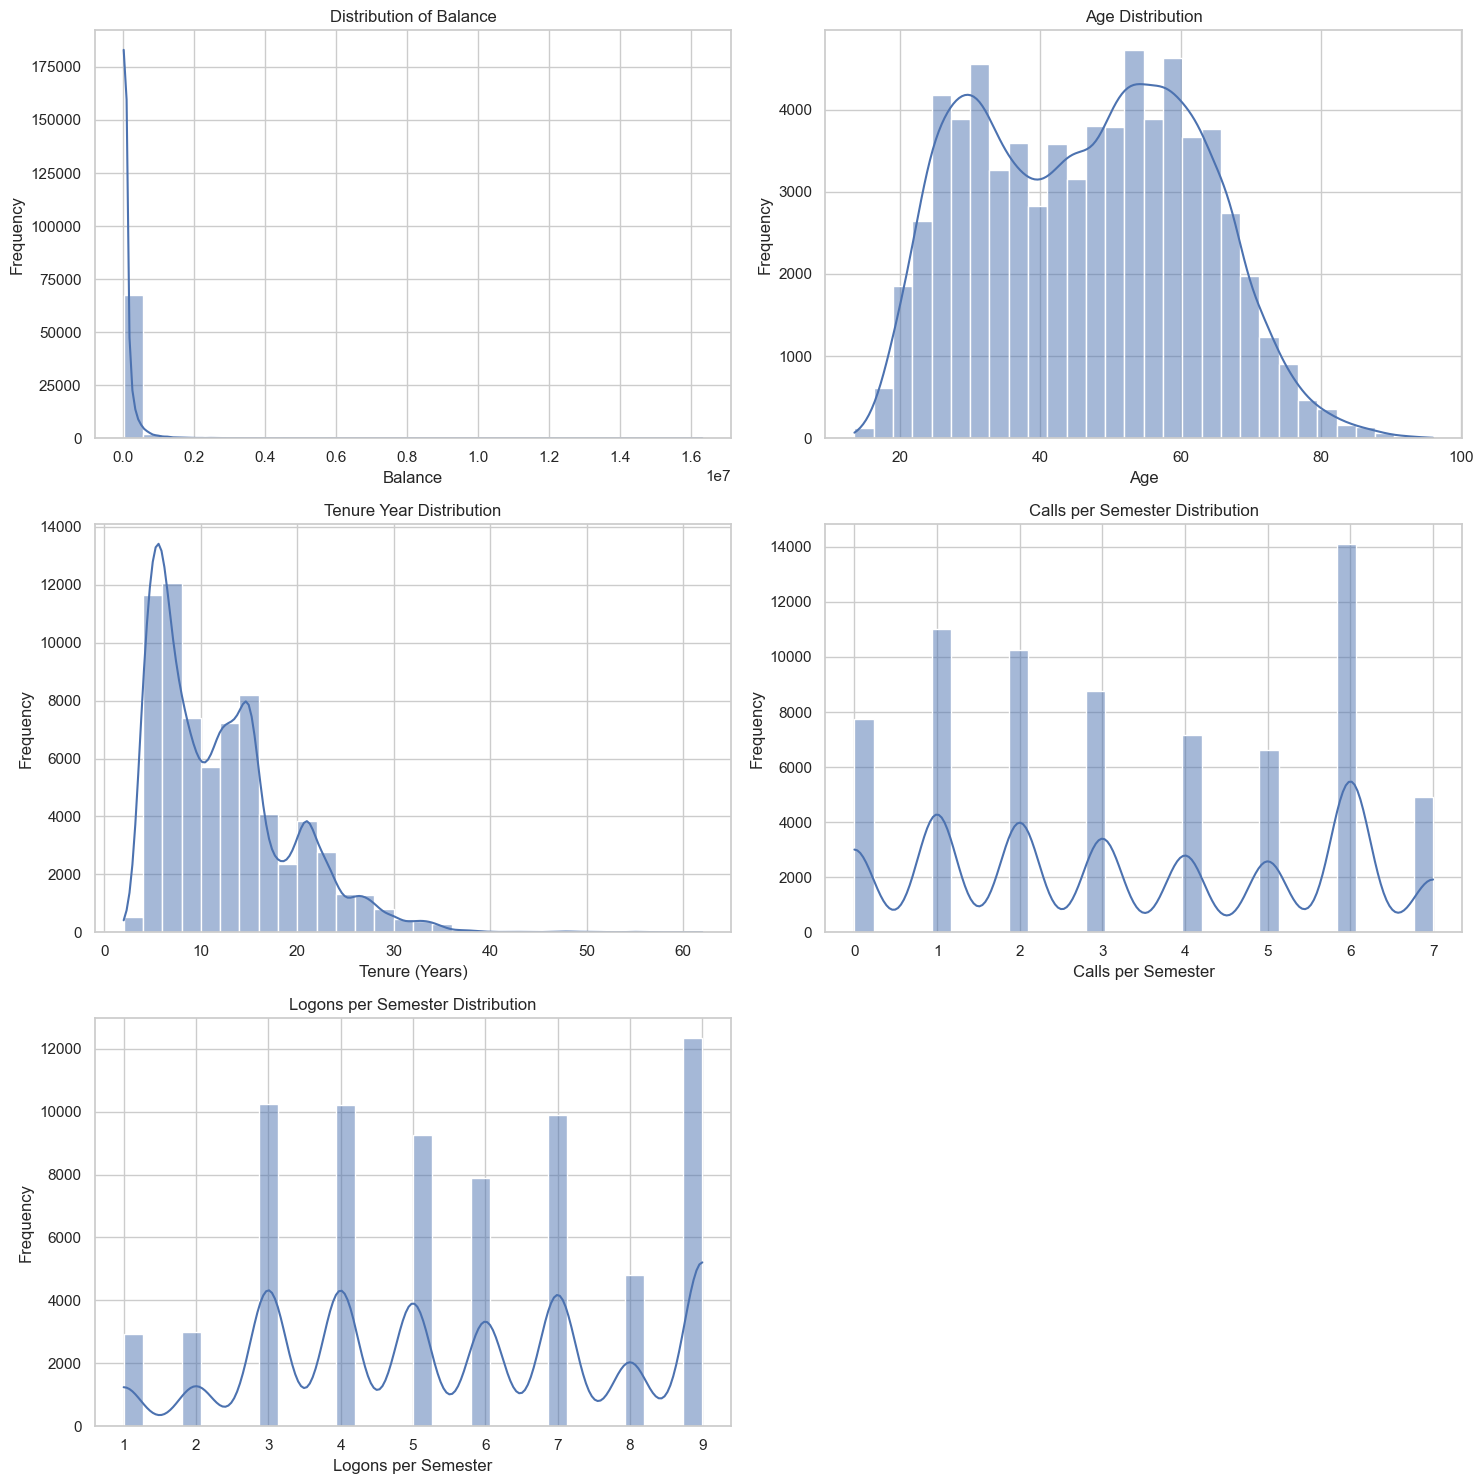

In [28]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# 1. Distribution of Balance
sns.histplot(df_experiment_merged['balance'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Balance')
axs[0, 0].set_xlabel('Balance')
axs[0, 0].set_ylabel('Frequency')

# 2. Age Distribution
sns.histplot(df_experiment_merged['age'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

# 3. Tenure Year Distribution
sns.histplot(df_experiment_merged['tenure_year'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Tenure Year Distribution')
axs[1, 0].set_xlabel('Tenure (Years)')
axs[1, 0].set_ylabel('Frequency')

# 4. Calls per Semester Distribution
sns.histplot(df_experiment_merged['calls_semester'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Calls per Semester Distribution')
axs[1, 1].set_xlabel('Calls per Semester')
axs[1, 1].set_ylabel('Frequency')

# 5. Logons per Semester Distribution
sns.histplot(df_experiment_merged['logons_semester'], bins=30, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Logons per Semester Distribution')
axs[2, 0].set_xlabel('Logons per Semester')
axs[2, 0].set_ylabel('Frequency')

# Hide the empty subplot (2, 1)
axs[2, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [29]:
df_test = df_experiment_merged[df_experiment_merged['variation'] == 'Test']
print(df_test.head())

   client_id variation  tenure_year  tenure_month   age gender  accounts  \
0    9988021      Test          5.0          64.0  79.0      U       2.0   
1    8320017      Test         22.0         274.0  34.5      M       2.0   
3    1982004      Test          6.0          80.0  44.5      U       2.0   
5    9466803      Test         11.0         137.0  27.0      F       2.0   
6    3170143      Test         21.0         254.0  53.5      F       2.0   

     balance  calls_semester  logons_semester  
0  189023.86             1.0              4.0  
1   36001.90             5.0              8.0  
3   30231.76             1.0              4.0  
5   46131.19             1.0              4.0  
6  192109.59             6.0              9.0  


In [30]:
df_test.describe()

,client_id,tenure_year,tenure_month,age,accounts,balance,calls_semester,logons_semester
count,2.695900e+04,26959.000000,26959.000000,26959.000000,26959.000000,2.695900e+04,26959.000000,26959.000000
mean,4.999626e+06,11.983048,149.854779,47.164973,2.249935,1.489715e+05,3.061909,6.101821
std,2.877614e+06,6.845175,81.786072,15.514439,0.529350,3.073834e+05,2.190562,2.177091
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516451e+06,6.000000,81.500000,33.500000,2.000000,3.973990e+04,1.000000,4.000000
50%,5.025928e+06,11.000000,134.000000,47.500000,2.000000,6.546867e+04,3.000000,6.000000
75%,7.470346e+06,15.000000,191.000000,59.500000,2.000000,1.394848e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [31]:
df_control = df_experiment_merged[df_experiment_merged['variation'] == 'Control']
print(df_control.head())

    client_id variation  tenure_year  tenure_month   age gender  accounts  \
2     4033851   Control         12.0         149.0  63.5      M       2.0   
4     9294070   Control          5.0          70.0  29.0      U       2.0   
7     6651403   Control         13.0         162.0  56.5      M       2.0   
9     2105948   Control          6.0          74.0  61.5      U       2.0   
12    9814849   Control         12.0         149.0  32.5      F       2.0   

      balance  calls_semester  logons_semester  
2   142642.26             5.0              8.0  
4    34254.54             0.0              3.0  
7   324712.88             4.0              7.0  
9    39795.28             1.0              4.0  
12   33807.15             1.0              4.0  


In [32]:
df_control.describe()

,client_id,tenure_year,tenure_month,age,accounts,balance,calls_semester,logons_semester
count,2.352600e+04,23526.000000,23526.000000,23526.000000,23526.000000,2.352600e+04,23526.000000,23526.000000
mean,5.013676e+06,12.087860,151.062102,47.498427,2.259925,1.501519e+05,3.129176,6.166242
std,2.877414e+06,6.877626,82.127663,15.521781,0.538568,2.958124e+05,2.184541,2.173053
min,1.028000e+03,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000
25%,2.515177e+06,6.000000,82.000000,33.500000,2.000000,4.012295e+04,1.000000,4.000000
50%,5.023832e+06,11.000000,137.000000,48.500000,2.000000,6.603145e+04,3.000000,6.000000
75%,7.483638e+06,16.000000,192.000000,60.000000,2.000000,1.406156e+05,5.000000,8.000000
max,9.998921e+06,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000


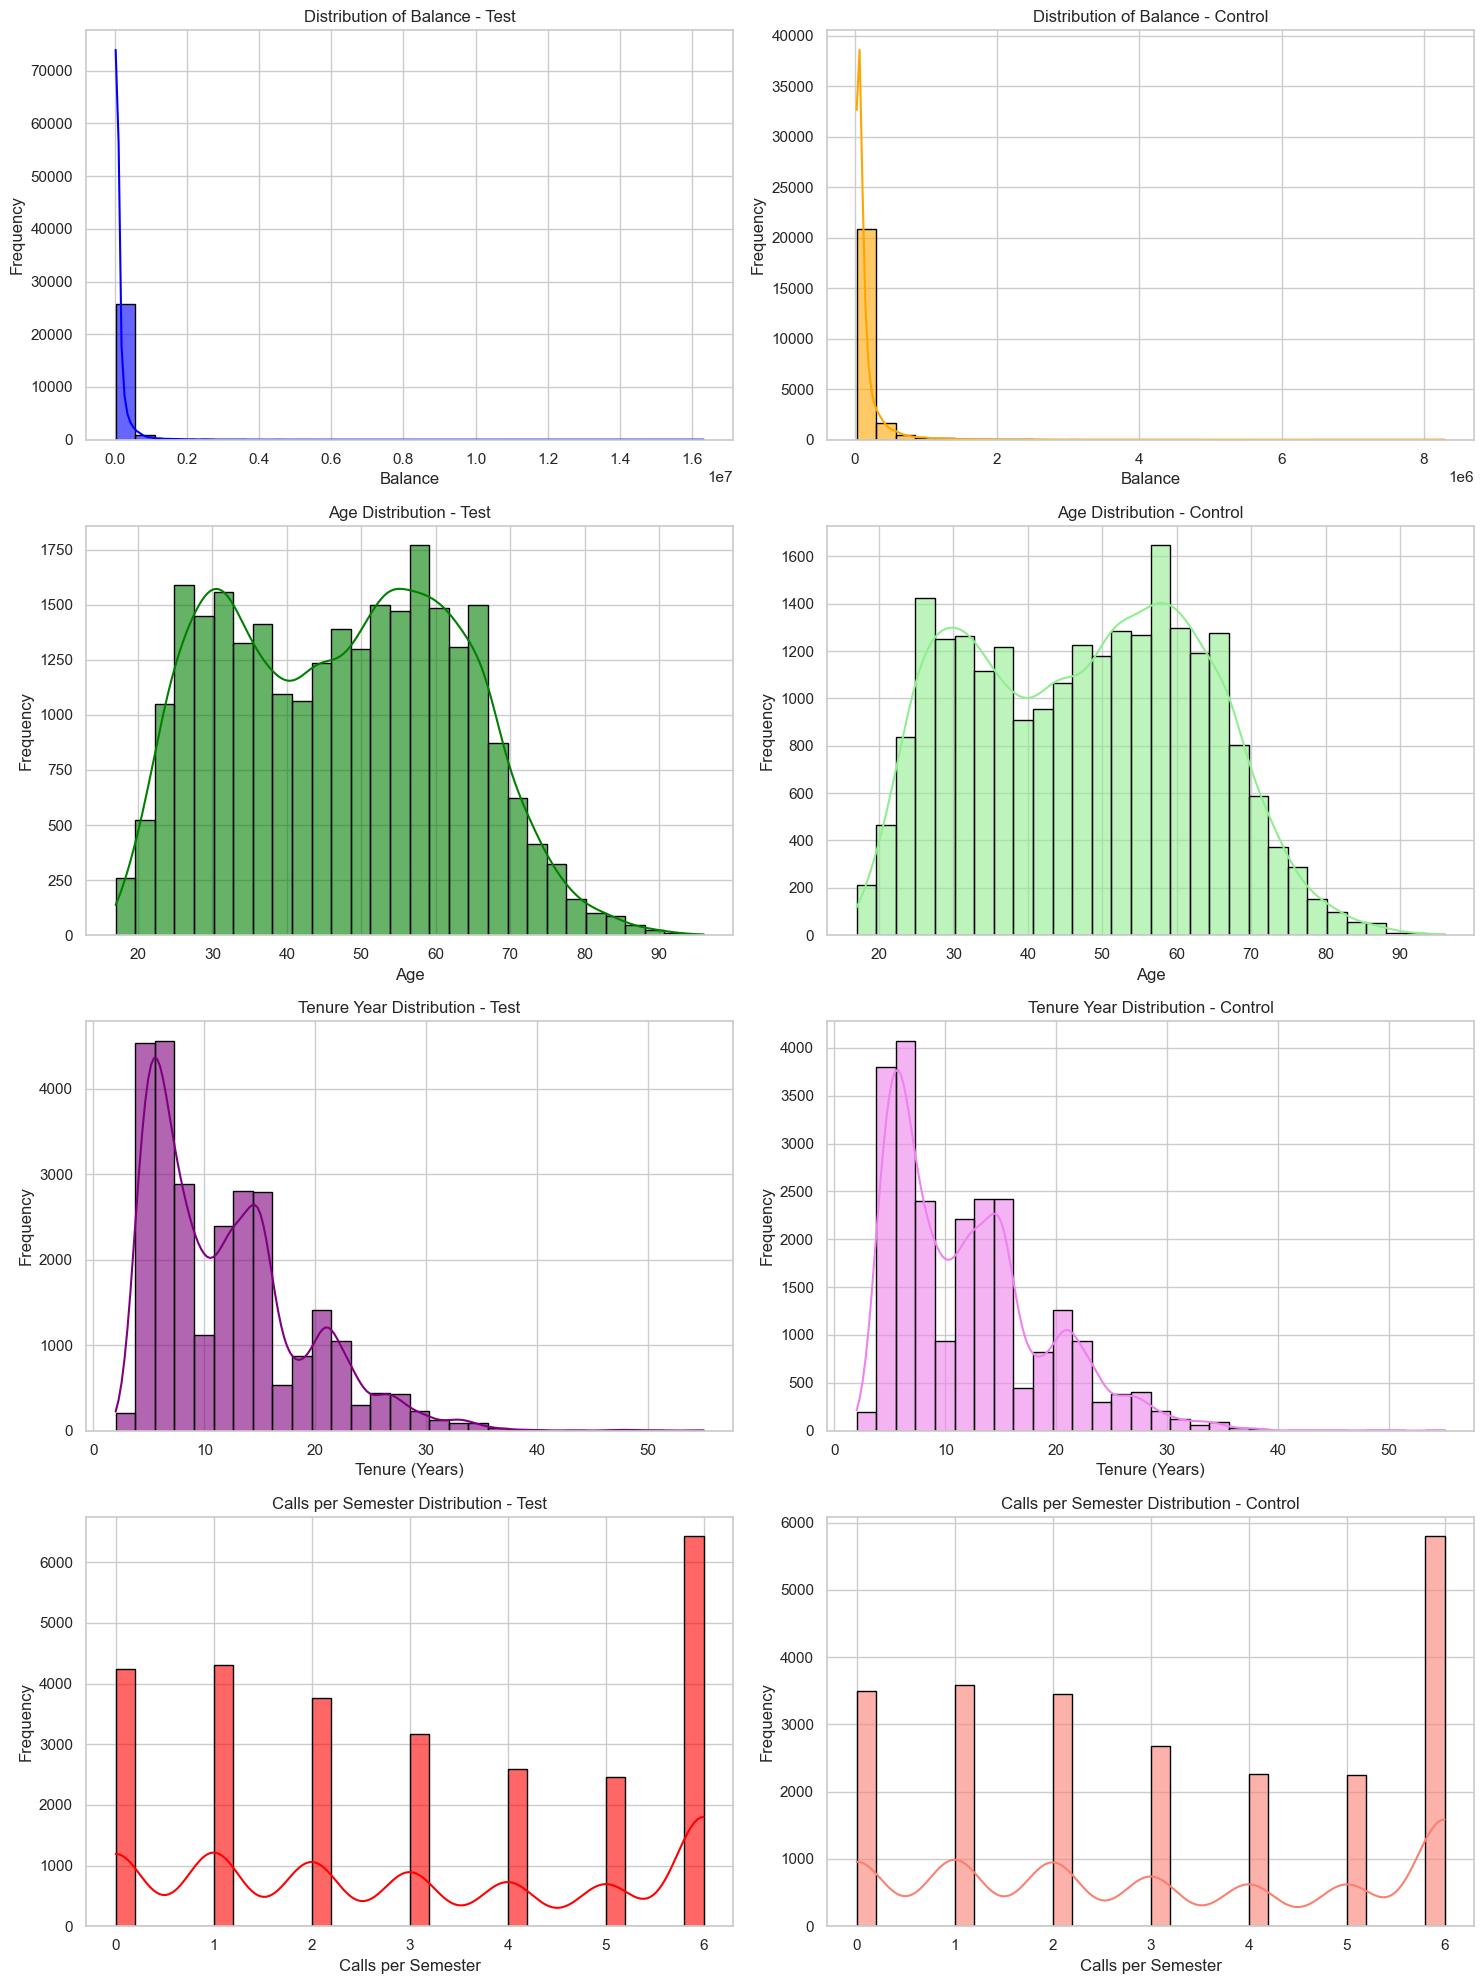

In [33]:
# Create a figure with multiple subplots for all columns except client_id, separated by variation
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# 1. Distribution of Balance for Test
sns.histplot(df_test['balance'], bins=30, kde=True, ax=axs[0, 0], color='blue', alpha=0.6, edgecolor='black')
axs[0, 0].set_title('Distribution of Balance - Test')
axs[0, 0].set_xlabel('Balance')
axs[0, 0].set_ylabel('Frequency')

# 2. Distribution of Balance for Control
sns.histplot(df_control['balance'], bins=30, kde=True, ax=axs[0, 1], color='orange', alpha=0.6, edgecolor='black')
axs[0, 1].set_title('Distribution of Balance - Control')
axs[0, 1].set_xlabel('Balance')
axs[0, 1].set_ylabel('Frequency')

# 3. Age Distribution for Test
sns.histplot(df_test['age'], bins=30, kde=True, ax=axs[1, 0], color='green', alpha=0.6, edgecolor='black')
axs[1, 0].set_title('Age Distribution - Test')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Frequency')

# 4. Age Distribution for Control
sns.histplot(df_control['age'], bins=30, kde=True, ax=axs[1, 1], color='lightgreen', alpha=0.6, edgecolor='black')
axs[1, 1].set_title('Age Distribution - Control')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Frequency')

# 5. Tenure Year Distribution for Test
sns.histplot(df_test['tenure_year'], bins=30, kde=True, ax=axs[2, 0], color='purple', alpha=0.6, edgecolor='black')
axs[2, 0].set_title('Tenure Year Distribution - Test')
axs[2, 0].set_xlabel('Tenure (Years)')
axs[2, 0].set_ylabel('Frequency')

# 6. Tenure Year Distribution for Control
sns.histplot(df_control['tenure_year'], bins=30, kde=True, ax=axs[2, 1], color='violet', alpha=0.6, edgecolor='black')
axs[2, 1].set_title('Tenure Year Distribution - Control')
axs[2, 1].set_xlabel('Tenure (Years)')
axs[2, 1].set_ylabel('Frequency')

# 7. Calls per Semester Distribution for Test
sns.histplot(df_test['calls_semester'], bins=30, kde=True, ax=axs[3, 0], color='red', alpha=0.6, edgecolor='black')
axs[3, 0].set_title('Calls per Semester Distribution - Test')
axs[3, 0].set_xlabel('Calls per Semester')
axs[3, 0].set_ylabel('Frequency')

# 8. Calls per Semester Distribution for Control
sns.histplot(df_control['calls_semester'], bins=30, kde=True, ax=axs[3, 1], color='salmon', alpha=0.6, edgecolor='black')
axs[3, 1].set_title('Calls per Semester Distribution - Control')
axs[3, 1].set_xlabel('Calls per Semester')
axs[3, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
# Adding a column for balance amounts in thousands
df_experiment_merged['balance_thousands'] = round(df_experiment_merged['balance'] / 1000, 2)
df_experiment_merged['balance_thousands'].head()

0    189.02
1     36.00
2    142.64
3     30.23
4     34.25
Name: balance_thousands, dtype: float64

In [35]:
# Creating a dataframe based upon the merged_dataframe, with Variation = Test or COntrol only, removing unknown values
df_experiment_merged_cleaned = df_experiment_merged[(df_experiment_merged["variation"] == "Test") | (df_experiment_merged["variation"] == "Control")]

In [36]:
df_experiment_merged_cleaned['balance_thousands'].describe()

count    50485.000000
mean       149.521599
std        302.044048
min         23.790000
25%         39.880000
50%         65.740000
75%        139.960000
max      16320.040000
Name: balance_thousands, dtype: float64

In [37]:
# resetting indexes, removing index column
#df_experiment_merged = df_experiment_merged.reset_index(drop=True, inplace=True)
#df_experiment_merged_unknowns = df_experiment_merged_unknowns.reset_index(drop=True, inplace=True)

In [38]:
df_experiment_merged_cleaned.head()

,client_id,variation,tenure_year,tenure_month,age,gender,accounts,balance,calls_semester,logons_semester,balance_thousands
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,189.02
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,36.00
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,142.64
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,30.23
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,34.25


In [39]:
# Creating CSVs for the cleaned dataframes
df_experiment_merged_cleaned.to_csv('df_experiment_merged_cleaned.csv', index=False)
df_experiment_merged.to_csv('df_experiment_clients.csv', index=False)

In [40]:
df_experiment_merged_cleaned

,client_id,variation,tenure_year,tenure_month,age,gender,accounts,balance,calls_semester,logons_semester,balance_thousands
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,189.02
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,36.00
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,142.64
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,30.23
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,34.25
...,...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0,60.34
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0,141.81
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0,58.78
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0,61.35


In [41]:
df_experiment_merged

,client_id,variation,tenure_year,tenure_month,age,gender,accounts,balance,calls_semester,logons_semester,balance_thousands
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,189.02
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,36.00
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,142.64
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,30.23
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,34.25
...,...,...,...,...,...,...,...,...,...,...,...
70604,2443347,Unknown,17.0,204.0,52.5,M,3.0,164693.48,7.0,7.0,164.69
70605,8788427,Unknown,10.0,121.0,59.5,M,2.0,203149.13,3.0,3.0,203.15
70606,266828,Unknown,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0,1135.07
70607,1266421,Unknown,13.0,164.0,33.0,M,3.0,27701.79,2.0,3.0,27.70


In [42]:
#Creating sub-dataframes for numerical and categorical data
df_numerical = df_experiment_merged_cleaned[['balance', 'balance_thousands', 'age', 'accounts', 'tenure_year', 'calls_semester', 'logons_semester']]
df_categorical = df_experiment_merged_cleaned[['variation', 'gender']]

In [43]:
df_numerical

,balance,balance_thousands,age,accounts,tenure_year,calls_semester,logons_semester
0,189023.86,189.02,79.0,2.0,5.0,1.0,4.0
1,36001.90,36.00,34.5,2.0,22.0,5.0,8.0
2,142642.26,142.64,63.5,2.0,12.0,5.0,8.0
3,30231.76,30.23,44.5,2.0,6.0,1.0,4.0
4,34254.54,34.25,29.0,2.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...
50495,60344.67,60.34,52.5,2.0,15.0,1.0,4.0
50496,141808.05,141.81,34.0,3.0,21.0,6.0,9.0
50497,58778.11,58.78,62.0,2.0,6.0,2.0,5.0
50498,61349.70,61.35,30.5,2.0,23.0,0.0,3.0


In [44]:
df_categorical

,variation,gender
0,Test,U
1,Test,M
2,Control,M
3,Test,U
4,Control,U
...,...,...
50495,Control,M
50496,Control,M
50497,Test,M
50498,Test,M


In [45]:
# Creating CSVs for numerical & categorical dataframes
df_numerical.to_csv('df_numerical.csv', index=False)
df_categorical.to_csv('df_categorical.csv', index=False)


In [46]:
# Separate the dataframe into "Test" and "Control" groups
test_group = df_experiment_merged_cleaned[df_experiment_merged_cleaned['variation'] == 'Test']
control_group = df_experiment_merged_cleaned[df_experiment_merged_cleaned['variation'] == 'Control']

# Perform demographic analysis by calculating basic statistics for age, gender distribution, tenure, and other metrics.

# Summary statistics for age, tenure, accounts, balance, calls, and logons for each group
test_summary = test_group[['age', 'tenure_year', 'accounts', 'balance', 'calls_semester', 'logons_semester']].describe()
control_summary = control_group[['age', 'tenure_year', 'accounts', 'balance', 'calls_semester', 'logons_semester']].describe()

# Gender distribution in each group
test_gender_distribution = test_group['gender'].value_counts(normalize=True) * 100
control_gender_distribution = control_group['gender'].value_counts(normalize=True) * 100

# Display the summaries and gender distributions
test_summary, control_summary, test_gender_distribution, control_gender_distribution


(                age   tenure_year      accounts       balance  calls_semester  \
 count  26959.000000  26959.000000  26959.000000  2.695900e+04    26959.000000   
 mean      47.164973     11.983048      2.249935  1.489715e+05        3.061909   
 std       15.514439      6.845175      0.529350  3.073834e+05        2.190562   
 min       17.000000      2.000000      1.000000  2.378944e+04        0.000000   
 25%       33.500000      6.000000      2.000000  3.973990e+04        1.000000   
 50%       47.500000     11.000000      2.000000  6.546867e+04        3.000000   
 75%       59.500000     15.000000      2.000000  1.394848e+05        5.000000   
 max       96.000000     55.000000      7.000000  1.632004e+07        6.000000   
 
        logons_semester  
 count     26959.000000  
 mean          6.101821  
 std           2.177091  
 min           3.000000  
 25%           4.000000  
 50%           6.000000  
 75%           8.000000  
 max           9.000000  ,
                 age   te

In [57]:
# Removing outliers from the balance column
balance_mean = df_experiment_merged_cleaned['balance'].mean()
balance_std = df_experiment_merged_cleaned['balance'].std()
lower_bound = balance_mean - 1.5 * balance_std
upper_bound = balance_mean + 1.5 * balance_std

#All groups
df_balance = df_experiment_merged_cleaned[(df_experiment_merged_cleaned["balance"].between(lower_bound, upper_bound))]

# Create the test_group DataFrame
test_group_balance = df_experiment_merged_cleaned[(df_experiment_merged_cleaned["balance"].between(lower_bound, upper_bound)) & (df_experiment_merged_cleaned["variation"] == "Test")]

# Create the control_group DataFrame
control_group_balance = df_experiment_merged_cleaned[(df_experiment_merged_cleaned["balance"].between(lower_bound, upper_bound)) & (df_experiment_merged_cleaned["variation"] == "Control")]

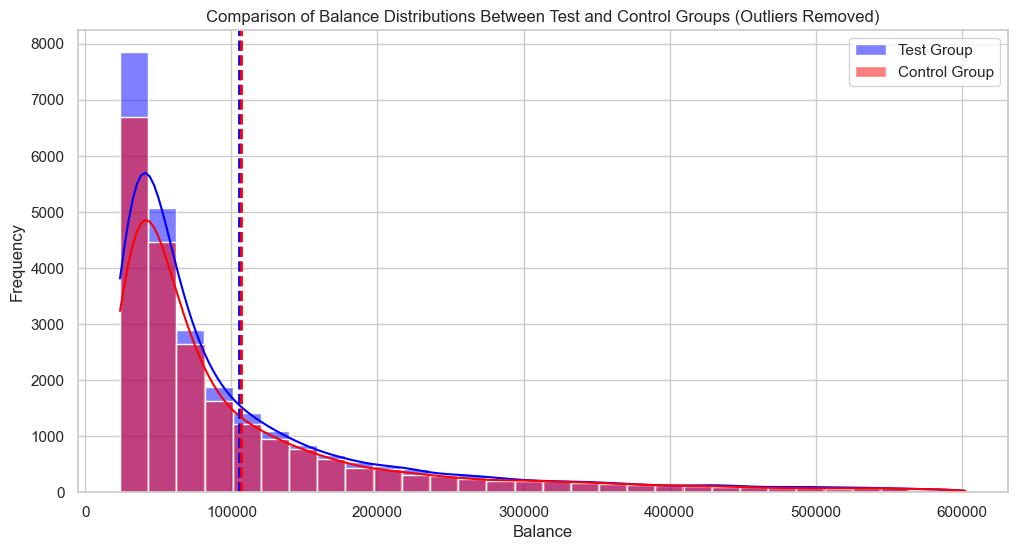

In [64]:
# Plot the histogram for both test_group_balance and control_group_balance
plt.figure(figsize=(12, 6))

# Plot histogram for test_group_balance
sns.histplot(test_group_balance['balance'], color='blue', label='Test Group', kde=True, bins=30)

# Plot histogram for control_group_balance
sns.histplot(control_group_balance['balance'], color='red', label='Control Group', kde=True, bins=30)

# Add a vertical line for the mean of test_group_balance
plt.axvline(test_group_balance['balance'].mean(), color='blue', linestyle='dashed', linewidth=2)

# Add a vertical line for the mean of control_group_balance
plt.axvline(control_group_balance['balance'].mean(), color='red', linestyle='dashed', linewidth=2)

# Add titles and labels
plt.title('Comparison of Balance Distributions Between Test and Control Groups (Outliers Removed)')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [66]:
# Separate the dataframe into "Test" and "Control" groups
test_group = df_experiment_merged_cleaned[df_experiment_merged_cleaned['variation'] == 'Test']
control_group = df_experiment_merged_cleaned[df_experiment_merged_cleaned['variation'] == 'Control']

# Define bins for tenure years
bins = [0, 10, 20, 30, df_experiment_merged_cleaned['tenure_year'].max()]
bin_labels = ['0-10 years', '10-20 years', '20-30 years', '30+ years']

# Create a new column for binned tenure years in both Test and Control groups
test_group['tenure_bin'] = pd.cut(test_group['tenure_year'], bins=bins, labels=bin_labels, right=False)
control_group['tenure_bin'] = pd.cut(control_group['tenure_year'], bins=bins, labels=bin_labels, right=False)

C:\Users\olivi\AppData\Local\Temp\ipykernel_41712\4210683847.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_group['tenure_bin'] = pd.cut(test_group['tenure_year'], bins=bins, labels=bin_labels, right=False)
C:\Users\olivi\AppData\Local\Temp\ipykernel_41712\4210683847.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group['tenure_bin'] = pd.cut(control_group['tenure_year'], bins=bins, labels=bin_labels, right=False)


In [71]:
df_experiment_merged_cleaned

,client_id,variation,tenure_year,tenure_month,age,gender,accounts,balance,calls_semester,logons_semester,balance_thousands
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,189.02
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,36.00
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,142.64
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,30.23
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,34.25
...,...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0,60.34
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0,141.81
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0,58.78
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0,61.35


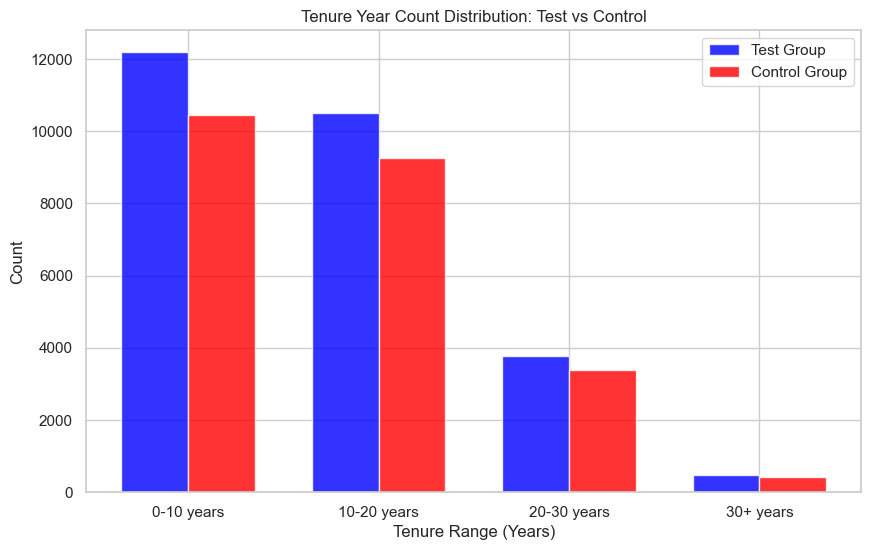

In [72]:
# Calculate the absolute counts of tenure bins for both Test and Control groups
test_tenure_counts = test_group['tenure_bin'].value_counts(sort=False)
control_tenure_counts = control_group['tenure_bin'].value_counts(sort=False)

# Define the x-axis positions for the bars
x = np.arange(len(bin_labels))  # label locations
width = 0.35  # width of the bars

# Plot the bars for Test and Control groups side by side with absolute counts
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, test_tenure_counts, width, label='Test Group', color='blue', alpha=0.8)
rects2 = ax.bar(x + width/2, control_tenure_counts, width, label='Control Group', color='red', alpha=0.8)

# Add labels and formatting
ax.set_xlabel('Tenure Range (Years)')
ax.set_ylabel('Count')
ax.set_title('Tenure Year Count Distribution: Test vs Control')
ax.set_xticks(x)
ax.set_xticklabels(bin_labels)
ax.legend()

# Display the plot
plt.show()

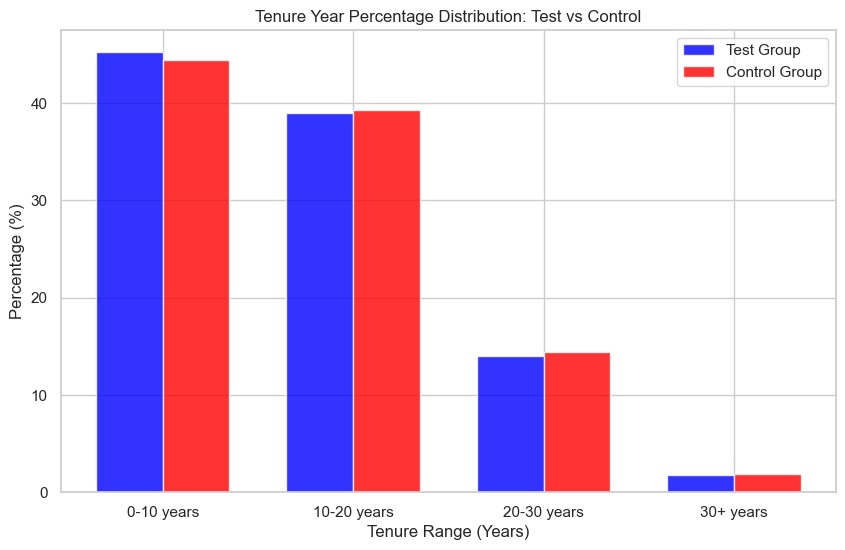

In [74]:
# Calculate the percentage distribution of tenure bins for both Test and Control groups
test_tenure_percentages = test_group['tenure_bin'].value_counts(normalize=True, sort=False) * 100
control_tenure_percentages = control_group['tenure_bin'].value_counts(normalize=True, sort=False) * 100

# Define the x-axis positions for the bars
x = np.arange(len(bin_labels))  # label locations
width = 0.35  # width of the bars

# Plot the bars for Test and Control groups side by side
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, test_tenure_percentages, width, label='Test Group', color='blue', alpha=0.8)
rects2 = ax.bar(x + width/2, control_tenure_percentages, width, label='Control Group', color='red', alpha=0.8)

# Add some labels and formatting
ax.set_xlabel('Tenure Range (Years)')
ax.set_ylabel('Percentage (%)')
ax.set_title('Tenure Year Percentage Distribution: Test vs Control')
ax.set_xticks(x)
ax.set_xticklabels(bin_labels)
ax.legend()

# Display the plot
plt.show()

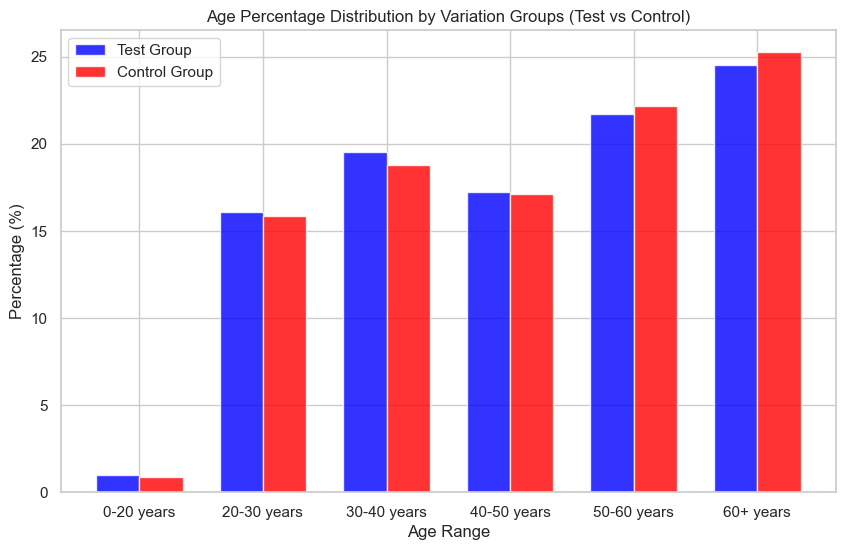

In [82]:
# Modify the code to plot age groups in percentages instead of absolute values

# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, df_experiment_merged_cleaned['age'].max()]
age_bin_labels = ['0-20 years', '20-30 years', '30-40 years', '40-50 years', '50-60 years', '60+ years']

# Calculate the percentage distribution of age bins for both Test and Control groups
test_age_percentages = test_group['age_bin'].value_counts(normalize=True, sort=False) * 100
control_age_percentages = control_group['age_bin'].value_counts(normalize=True, sort=False) * 100

# Plot the percentage distribution of age bins for Test and Control groups side by side
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, test_age_percentages, width, label='Test Group', color='blue', alpha=0.8)
rects2 = ax.bar(x + width/2, control_age_percentages, width, label='Control Group', color='red', alpha=0.8)

# Add labels and formatting
ax.set_xlabel('Age Range')
ax.set_ylabel('Percentage (%)')
ax.set_title('Age Percentage Distribution by Variation Groups (Test vs Control)')
ax.set_xticks(x)
ax.set_xticklabels(age_bin_labels)
ax.legend()

# Display the plot
plt.show()


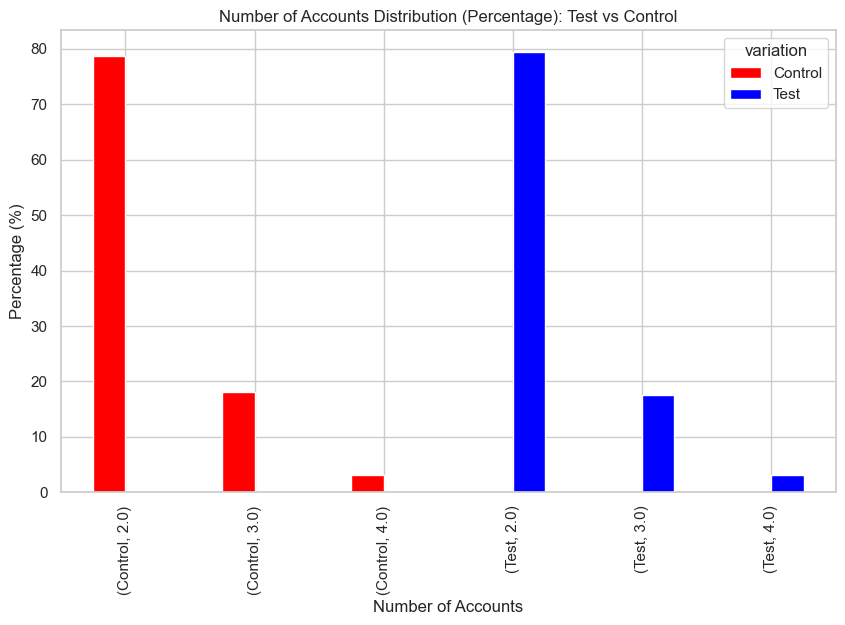

In [91]:
# Number of accounts in Percentages per Variation group

filtered_df = df_experiment_merged_cleaned[(df_experiment_merged_cleaned['accounts'] != 1) & (df_experiment_merged_cleaned['accounts'] <= 4)]

# Calculate the percentage distribution
account_dist = filtered_df.groupby(['accounts', 'variation']).size().groupby(level=1).apply(lambda x: 100 * x / x.sum()).unstack()

# Plot the percentage bar plot
account_dist.plot(kind='bar', stacked=False, figsize=(10, 6), color=['red', 'blue'])
plt.title('Number of Accounts Distribution (Percentage): Test vs Control')
plt.xlabel('Number of Accounts')
plt.ylabel('Percentage (%)')
plt.show()

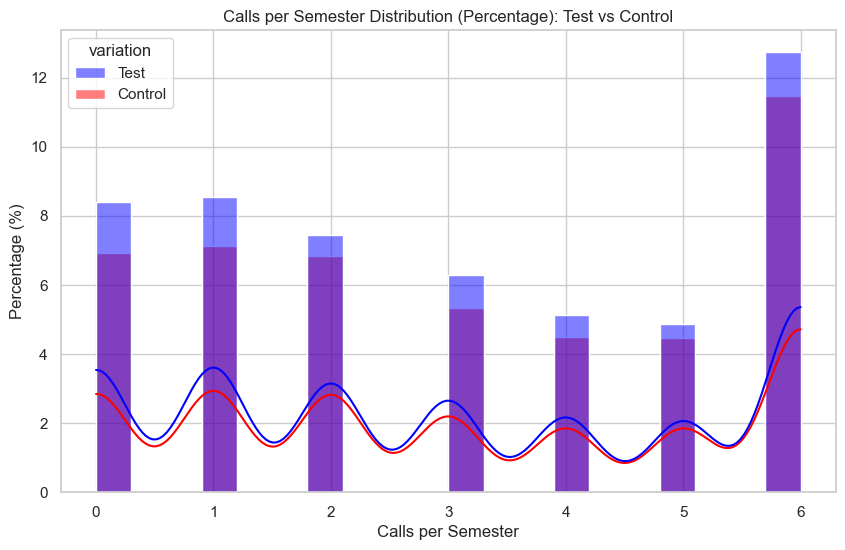

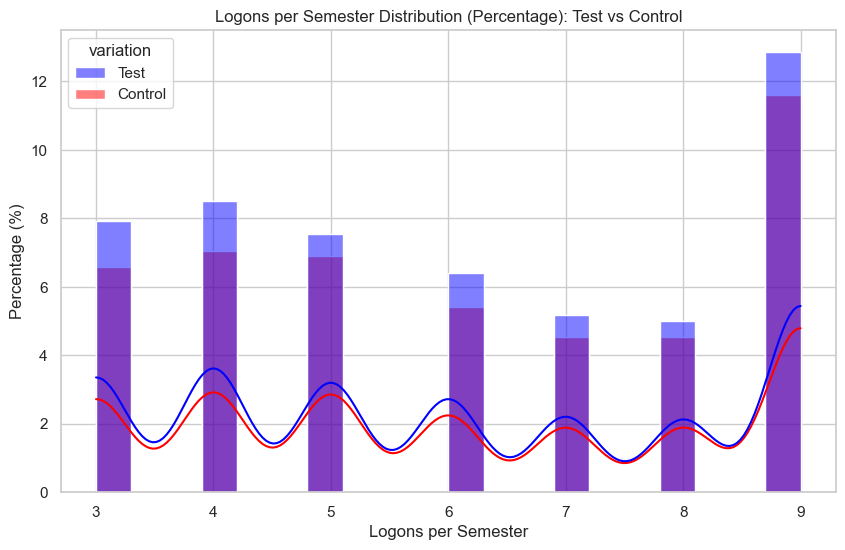

In [90]:
# 4. Calls per Semester - Percentage Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_experiment_merged_cleaned, x='calls_semester', hue='variation', kde=True, bins=20, stat='percent', palette=['blue', 'red'])
plt.title('Calls per Semester Distribution (Percentage): Test vs Control')
plt.xlabel('Calls per Semester')
plt.ylabel('Percentage (%)')
plt.show()

# 5. Logons per Semester - Percentage Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df_experiment_merged_cleaned, x='logons_semester', hue='variation', kde=True, bins=20, stat='percent', palette=['blue', 'red'])
plt.title('Logons per Semester Distribution (Percentage): Test vs Control')
plt.xlabel('Logons per Semester')
plt.ylabel('Percentage (%)')
plt.show()

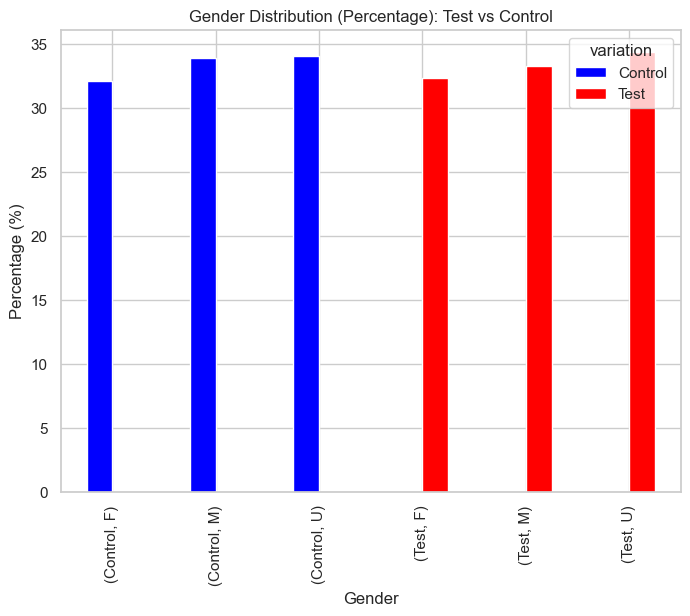

In [94]:


# Gender Distribution - Percentage Bar plot
gender_dist = df_experiment_merged_cleaned.groupby(['gender', 'variation']).size().groupby(level=1).apply(lambda x: 100 * x / x.sum()).unstack()
gender_dist.plot(kind='bar', stacked=False, figsize=(8, 6), color=['blue', 'red'])
plt.title('Gender Distribution (Percentage): Test vs Control')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.show()

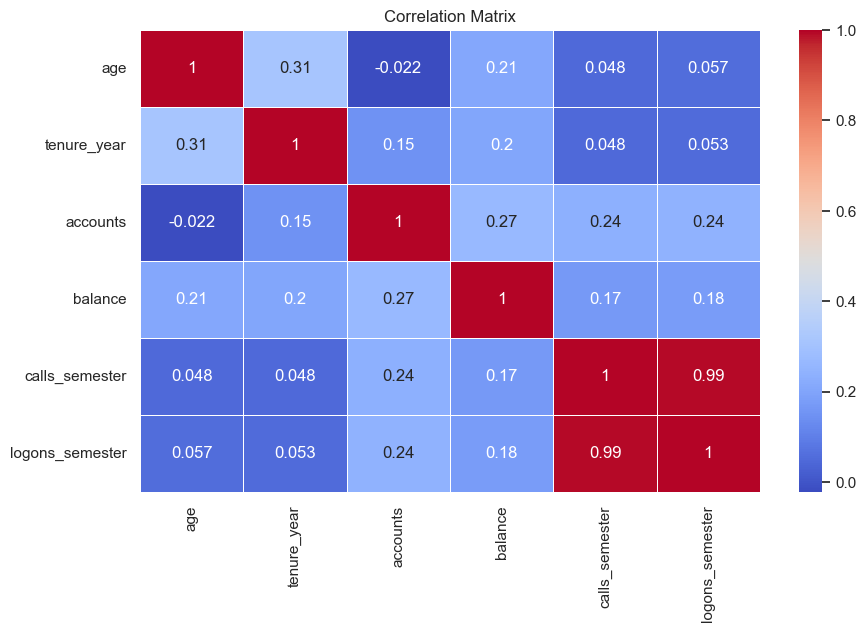

In [93]:
# 9. Correlation Matrix - Heatmap (no percentage adjustment here)
correlation_matrix = df_experiment_merged_cleaned[['age', 'tenure_year', 'accounts', 'balance', 'calls_semester', 'logons_semester']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()